In [33]:
include("MakeRaytracingPlots.jl")

start! (generic function with 1 method)

In [34]:
using Printf
for i=1:15
    create_plots(
        string("/scratch/nad9961/swqg/52585523/", i), 
        @sprintf("case_%02d_2048_packets", i), 
        30, 1:8:(128^2), 3 * i/10, i/10)
    flush(stdout)
end

512, 445
Reading file: /scratch/nad9961/swqg/52585523/1/packets.000000.jld2
Creating images/wavenumber_spread_case_512P1.png
Creating frequency spectra
32
Done
512, 889
Reading file: /scratch/nad9961/swqg/52585523/2/packets.000000.jld2
Creating images/wavenumber_spread_case_512P2.png
Creating frequency spectra
31
Done
512, 1334
Reading file: /scratch/nad9961/swqg/52585523/3/packets.000000.jld2
Reading file: /scratch/nad9961/swqg/52585523/3/packets.000001.jld2
Creating images/wavenumber_spread_case_512P3.png
Creating frequency spectra
31


LoadError: InterruptException:

In [49]:
function create_diagnostics(directory)
    qg_file = jldopen(@sprintf("%s/qgsw.%06d.jld2", directory, 0), "r")
    diagnostics_file = jldopen(directory * "/diagnostics.jld2")

    N = length(keys(diagnostics_file["diagnostics/kinetic_energy/t"]))

    t = diagnostics_file["diagnostics/kinetic_energy/t"]
    kinetic_energy = diagnostics_file["diagnostics/kinetic_energy/data"]
    potential_energy = diagnostics_file["diagnostics/potential_energy/data"]
    enstrophy = diagnostics_file["diagnostics/enstrophy/data"]
    total_energy = kinetic_energy + potential_energy

    for snap

    close(qg_file)
    close(diagnostics_file)
    return t, kinetic_energy, potential_energy, total_energy, enstrophy
end

t, KE, PE, E, Z = create_diagnostics("/scratch/nad9961/swqg/52585523/9")

([0.0, 0.49823713302612305, 0.9964682459831238, 1.4947113990783691, 1.9929546117782593, 2.4911739826202393, 2.9893929958343506, 3.487612009048462, 3.9858310222625732, 4.484050273895264  …  3143.6533203125, 3144.14892578125, 3144.64453125, 3145.14013671875, 3145.6357421875, 3146.13134765625, 3146.626953125, 3147.12255859375, 3147.6181640625, 3148.11376953125], Float32[0.014795392, 0.014789133, 0.01477075, 0.014740633, 0.014698759, 0.014644963, 0.014579602, 0.014503764, 0.014419277, 0.014328769  …  0.005492197, 0.0054921336, 0.0054920902, 0.0054920646, 0.0054920553, 0.0054920614, 0.005492081, 0.0054921084, 0.005492142, 0.005492186], Float32[0.0010025379, 0.0010088034, 0.0010271872, 0.0010573035, 0.0010991765, 0.0011529656, 0.0012183136, 0.0012941282, 0.0013785809, 0.001469037  …  0.010239221, 0.010239309, 0.010239348, 0.010239339, 0.010239308, 0.010239259, 0.010239215, 0.010239157, 0.010239089, 0.010239049], Float32[0.01579793, 0.015797937, 0.015797937, 0.015797935, 0.015797935, 0.015797

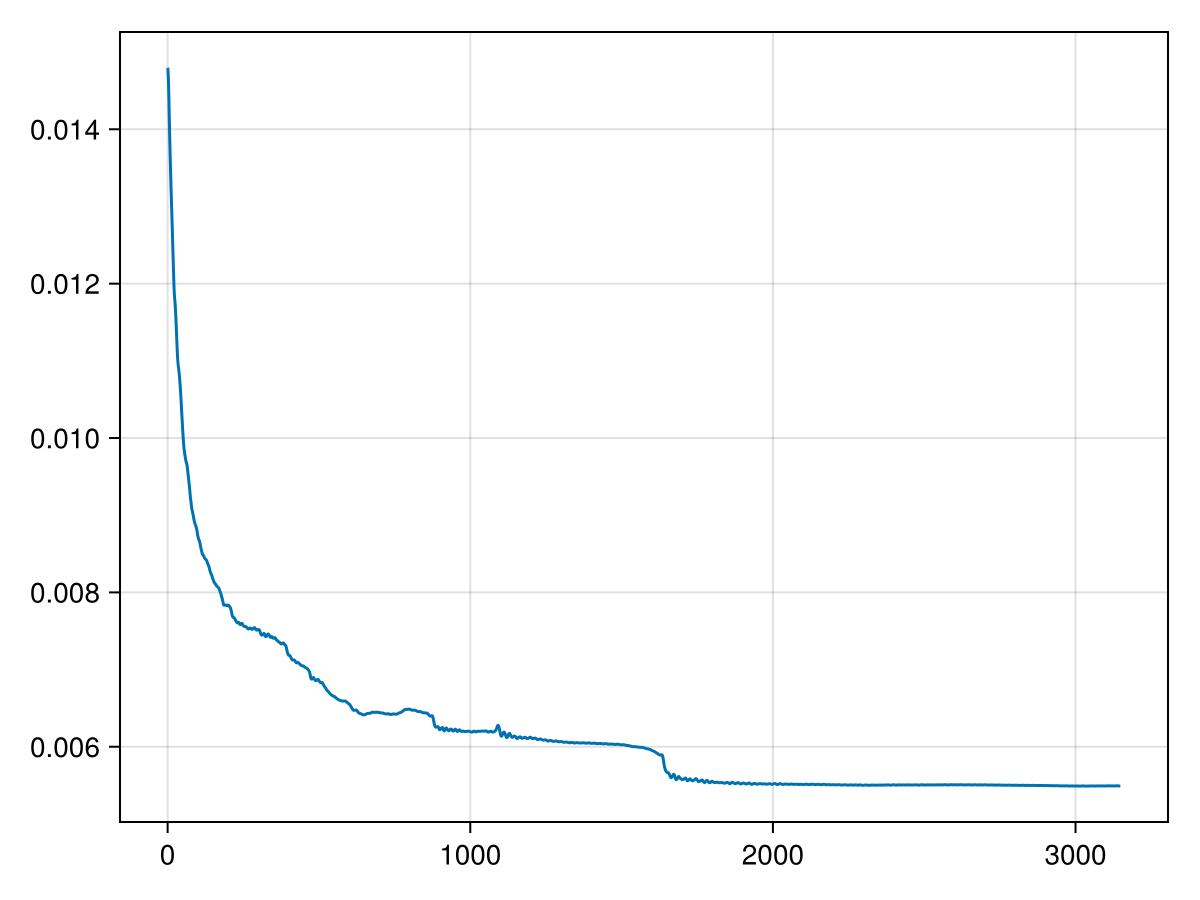

In [86]:
lines(t, KE)

In [153]:
using FourierFlows
using FourierFlows: parsevalsum2
grid = TwoDGrid(; nx=512, Lx=2π)
qg_file = jldopen(@sprintf("%s/qgsw.%06d.jld2", "/scratch/nad9961/swqg/52585523/4", 0), "r")
Kd2 = qg_file["params/Kd2"]
N = length(keys(qg_file["snapshots/t"]))
println(N)
qg_t = zeros(N)
eddy_scale = zeros(N)
qg_KE = zeros(N)
qg_PE = zeros(N)
rms_U = zeros(N)
qg_idx = 1
for idx = keys(qg_file["snapshots/t"])
    qg_t[qg_idx] = qg_file["snapshots/t/$idx"]
    qh = qg_file["snapshots/sol/$idx"]
    ψh  = @. -qh /(grid.Krsq + Kd2)
    vh = @. 1im * grid.kr * ψh
    uh = @. 1im * grid.l  * ψh
    eddy_scale[qg_idx] = sqrt(parsevalsum2(ψh, grid) ./ (parsevalsum2(vh, grid) + parsevalsum2(-uh, grid)))
    rms_U[qg_idx] = sqrt(parsevalsum2(uh, grid) + parsevalsum2(vh, grid)) / grid.Lx
    qg_KE[qg_idx] = 0.5 * parsevalsum2(sqrt.(grid.Krsq) .* ψh, grid)
    qg_PE[qg_idx] = Kd2 * parsevalsum2(ψh, grid)
    qg_idx += 1
end
println(keys(qg_file["snapshots/sol"]))
close(qg_file)

357
["0", "85554", "88949", "92344", "95739", "99134", "102529", "105924", "109319", "112714", "116109", "119504", "122899", "126294", "129689", "133084", "136479", "139874", "143269", "146664", "150059", "153454", "156849", "160244", "163639", "167034", "170429", "173824", "177219", "180614", "184009", "187404", "190799", "194194", "197589", "200984", "204379", "207774", "211169", "214564", "217959", "221354", "224749", "228144", "231539", "234934", "238329", "241724", "245119", "248514", "251909", "255304", "258699", "262094", "265489", "268884", "272279", "275674", "279069", "282464", "285859", "289254", "292649", "296044", "299439", "302834", "306229", "309624", "313019", "316414", "319809", "323204", "326599", "329994", "333389", "336784", "340179", "343574", "346969", "350364", "353759", "357154", "360549", "363944", "367339", "370734", "374129", "377524", "380919", "384314", "387709", "391104", "394499", "397894", "401289", "404684", "408079", "411474", "414869", "418264", "4216

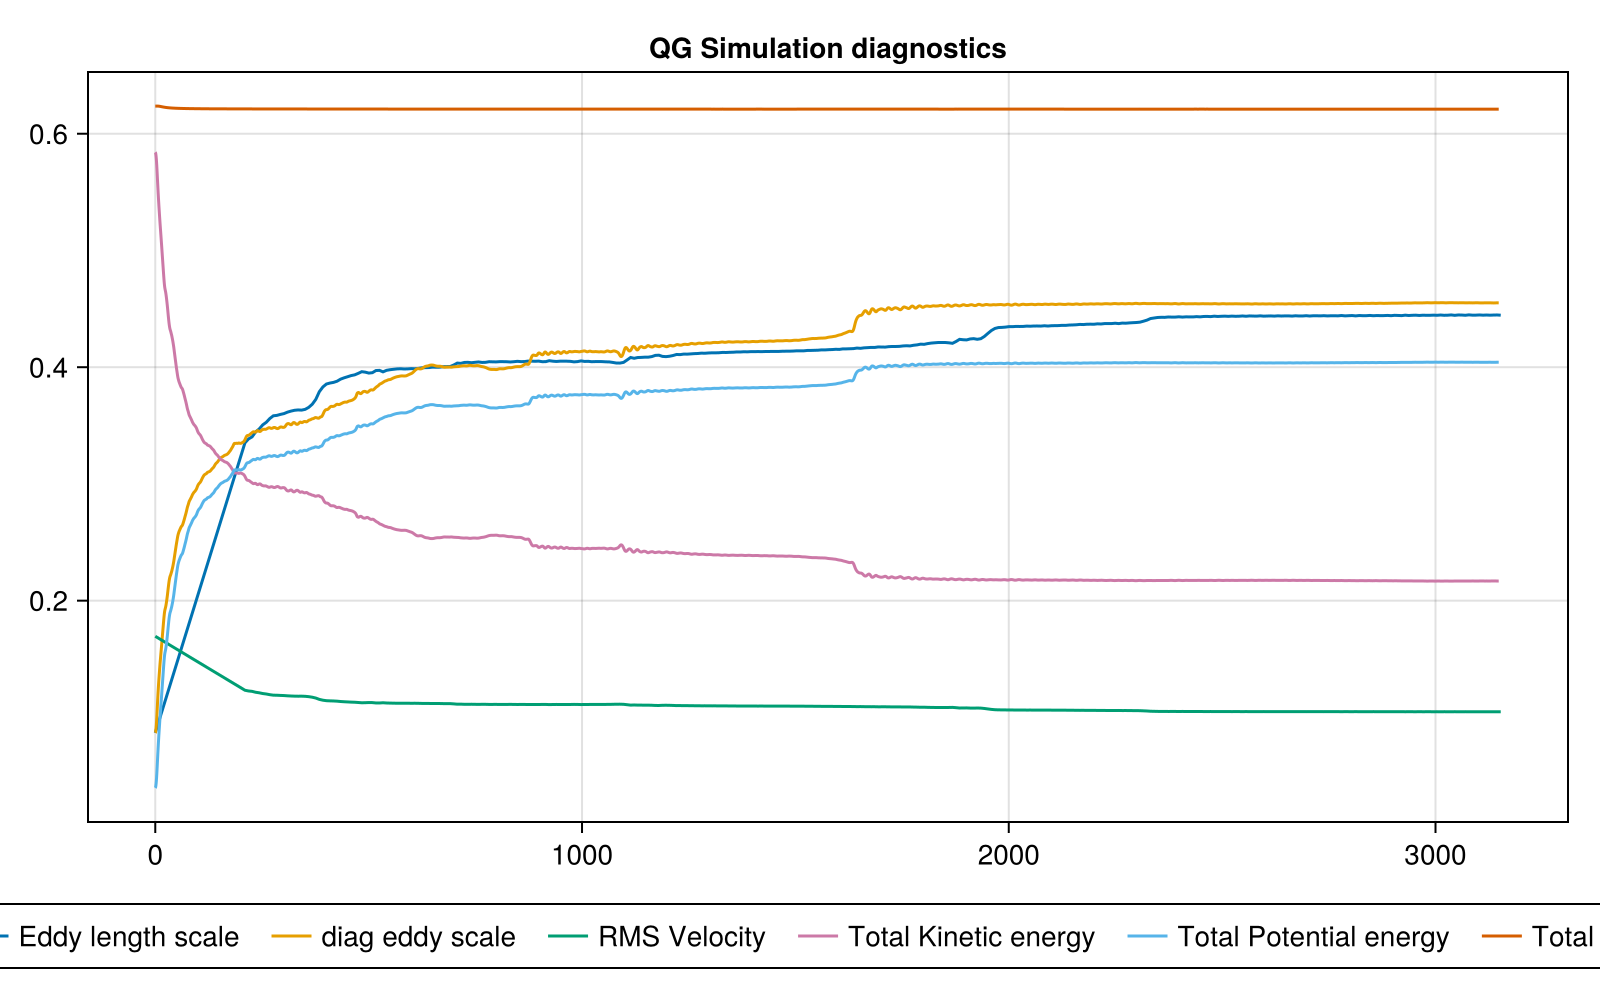

In [154]:
f = Figure(size=(800, 500))
ax = Axis(f[1,1]; title="QG Simulation diagnostics")
lines!(ax, qg_t, eddy_scale, label="Eddy length scale")
lines!(ax, t, 1/sqrt(Kd2)*sqrt.(PE)./sqrt.(KE), label="diag eddy scale")
lines!(ax, qg_t, rms_U, label="RMS Velocity")
lines!(ax, t, (grid.Lx)^2*KE, label="Total Kinetic energy")
lines!(ax, t, (grid.Lx)^2*PE, label="Total Potential energy")
lines!(ax, t, (grid.Lx)^2*E, label="Total energy")
# lines!(ax, [t[1], t[end]], [1/sqrt(Kd2), 1/sqrt(Kd2)])

Legend(f[2, 1], ax, orientation=:horizontal)

f